<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and KNN - Train/Test Split

---

# Introduction

We've discussed overfitting in the context of bias and variance, and we've touched on some techniques, such as regularization, that are used to avoid overfitting (but haven't practiced them yet). In this lesson we'll discuss a fundamental method for avoiding overfitting that is commonly referred to as _train/test split_ validation. 

The idea is similar to something called "cross-validation" — in fact, it is a type of cross-validation — in that we split the data set into two subsets:
* A subset on which to train our model.
* A subset on which to test our model's predictions.

This serves two useful purposes:
* We prevent overfitting by not using all of the data.
* We have some remaining data we can use to evaluate our model.

While this may seem like a relatively simple idea, **there are some caveats** to putting it into practice. For example, if you are not careful, it is easy to take a non-random split. Suppose we have salary data on technical professionals that is composed of 80 percent data from California and 20 percent data from elsewhere and is sorted by state. If we split our data into 80 percent training data and 20 percent testing data, we might inadvertantly select all the California data to train and all the non-California data to test. In this case we've still overfit on our data set because we did not sufficiently randomize the data.

In a situation like this we can use _k-fold cross-validation_, which is the same idea applied to more than two subsets. In particular, we partition our data into $k$ subsets and train on $k-1$ one of them, holding the last slice for testing. We can do this for each of the possible $k-1$ subsets.

# Independent Practice

Ultimately we use a test-training split to compare multiple models on the same data set. This could be comparisons of two linear models or of completely different models on the same data.

For your independent practice, fit three different models on the Boston housing data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model you'd like. 

### Here's What We Will Be Doing:

* Working with Boston housing data to predict the value of a home
* Create a test-train split of the data.
* Train each of your models on the training data.
* Evaluate each of the models on the test data.
* Rank the models by how well they score on the testing data set.

**Then, try k-folds.**

* Try a few different splits of data for the same models.
* Perform a k-fold cross-validation and use the cross-validation scores to compare your models. Did this change your rankings?

**Be sure to provide interpretation for your results.**

Recall that k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression Use Case

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston. This is a probable use case: We are predicting a continuous, numeric output (price) based on a combination of discrete features.

In [1]:
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### 1. Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

In [3]:
# Exploratory data analysis.

# Include: total nulls, index, data types, shape, summary statistics, and the number of unique values for each column


In [3]:
# Verify total nulls by features - find missing value by features
X.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [4]:
# Concise summary (including memory usage) — useful to quickly see if nulls exist
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [5]:
# accesses the `index` attribute 
# The row index (aka "the row labels" — in this case integers)
X.index

RangeIndex(start=0, stop=506, step=1)

In [6]:
# Column names (which is "an index")
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [7]:
y.columns

Index(['MEDV'], dtype='object')

In [8]:
# Check X's type.
print((type(X)))
print((type(X.values)))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [9]:
# Check y's type.
print((type(y)))
print((type(y.values)))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [10]:
# Datatypes of each column — each column is stored as an ndarray, which has a datatype
X.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [11]:
# Datatypes of y
y.dtypes

MEDV    float64
dtype: object

In [12]:
# Check X's shape (506 = number of observations, 13 = number of features).
print((X.shape))

(506, 13)


In [13]:
# Check y's shape (506 = number of observations, 1 = number of response).
print((y.shape))

(506, 1)


In [14]:
# Check out the summary statistics:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [15]:
# Describe all columns, including non-numeric.
y.describe(include='all')

,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [16]:
# Detecting duplicate rows
#X.duplicated()         # True if a row is identical to a previous row
X.duplicated().sum()    # Count of duplicates
#X[X.duplicated()]   # Only show duplicates

0

In [17]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

## Using `scikit-learn` Linear Regression

### 2. Pick 3-4 predictors (i.e. CRIM, ZN, etc...) that you will use to predict our target variable, MEDV.
Score and plot your predictions. What do these results tell us?

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")

In [19]:
# Preview the first five rows of the DataFrame.
X.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [23]:
# Create X for 4 features and y.
feature_cols = ['CRIM','INDUS','RM','DIS']
X4feature = X[feature_cols]

In [22]:
print((type(X4feature)))
# Check X's type.# Check  
print((type(X4feature.values)))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [24]:
# Check y's type.
print((type(y)))
print((type(y.values)))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [25]:
# Check X's shape (506 = number of observations, 4 = number of features).# Check  
print((X4feature.shape))

(506, 4)


In [39]:
# Concatenate the original DataFrame and the dummy DataFrame (axis=0 means rows, axis=1 means columns).
boston4feature = pd.concat([X4feature, y], axis=1)
boston4feature.head(5)

,CRIM,INDUS,RM,DIS,MEDV
0,0.00632,2.31,6.575,4.0900,24.0
1,0.02731,7.07,6.421,4.9671,21.6
2,0.02729,7.07,7.185,4.9671,34.7
3,0.03237,2.18,6.998,6.0622,33.4
4,0.06905,2.18,7.147,6.0622,36.2


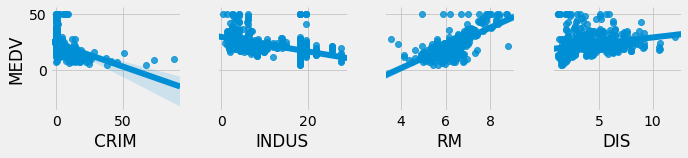

In [40]:
# Multiple scatterplots in Seaborn
sns.pairplot(boston4feature, x_vars=feature_cols, y_vars='MEDV', kind='reg');

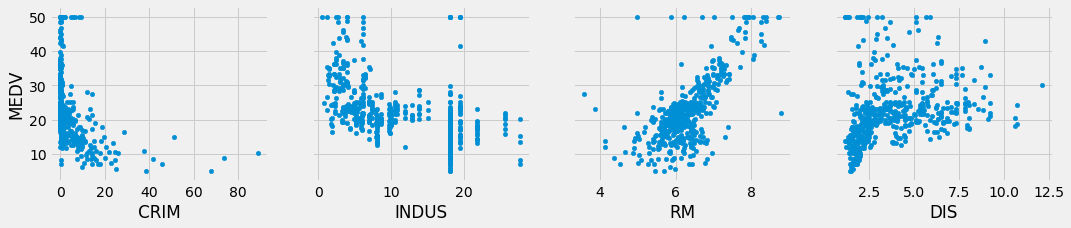

In [41]:
# Multiple scatterplots in Pandas
fig, axs = plt.subplots(1, len(feature_cols), sharey=True)
for index, feature in enumerate(feature_cols):
    boston4feature.plot(kind='scatter', x=feature, y='MEDV', ax=axs[index], figsize=(16, 3))

D:\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


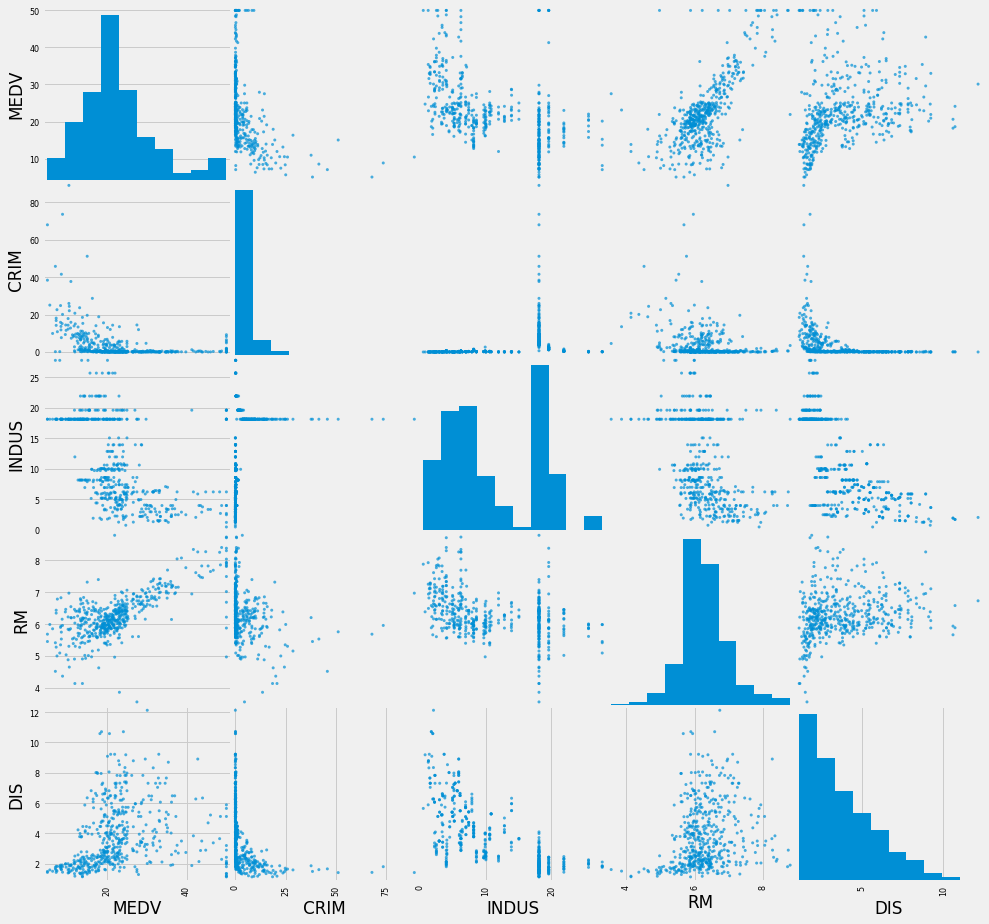

In [42]:
# alternative way in Pandas (might take a while)
# scatter_matrix does a pairplot of *every* column

grr = pd.tools.plotting.scatter_matrix(boston4feature[['MEDV'] + feature_cols], figsize=(15, 15), alpha=0.7)

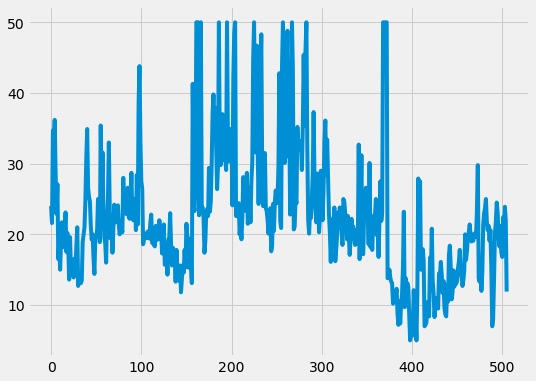

In [43]:
# Line plot of rentals
boston4feature.MEDV.plot();

In [44]:
# Correlation matrix (ranges from 1 to -1)
boston4feature.corr()

,CRIM,INDUS,RM,DIS,MEDV
CRIM,1.000000,0.404471,-0.219940,-0.377904,-0.385832
INDUS,0.404471,1.000000,-0.391676,-0.708027,-0.483725
RM,-0.219940,-0.391676,1.000000,0.205246,0.695360
DIS,-0.377904,-0.708027,0.205246,1.000000,0.249929
MEDV,-0.385832,-0.483725,0.695360,0.249929,1.000000


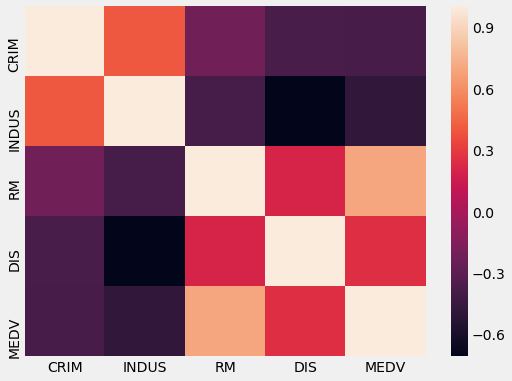

In [45]:
# Visualize correlation matrix in Seaborn using a heat map.
sns.heatmap(boston4feature.corr())

### scikit-learn's Four-Step Modeling Pattern

In [19]:
# Step 1: Import the class
from sklearn.linear_model import LinearRegression

In [20]:
# Step 2: Make an instance of a LinearRegression object.
lr = LinearRegression()
type(lr)

sklearn.linear_model.base.LinearRegression

In [24]:
#To view the possible parameters, either use the help built-in function or evaluate the newly instantiated model
#help(lr)
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
# Step 3: Fit the model with data (aka "model training").
lr.fit(X4feature, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
# Explore the intercept and coefficients of the linear model
print(lr.intercept_)
print(lr.coef_)

[-17.20621845]
[[-0.21469794 -0.3726061   7.47526223 -0.6110763 ]]


Interpreting the coefficients:

Holding all other features fixed, a 1-unit increase in per capita crime rate by town is associated with a median value of owner-occupied homes decrease of 0.215 price units.
Holding all other features fixed, a 1-unit increase in proportion of non-retail business acres per town is associated with a median value of owner-occupied homes decrease of 0.373 price units.
Holding all other features fixed, a 1-unit increase in average number of rooms per dwelling is associated with a median value of owner-occupied homes increase of 7.475 price units.
Holding all other features fixed, a 1-unit increase in weighted distances to five Boston employment centres is associated with a median value of owner-occupied homes decrease of 0.611 price units.

In [57]:
boston4feature.mean()

CRIM      3.593761
INDUS    11.136779
RM        6.284634
DIS       3.795043
MEDV     22.532806
dtype: float64

In [103]:
# Step 4: Predict the response for a new observation.
# Predict the response values for the observations in X ("test the model").
lr.predict(X4feature)

array([[28.5822517 ],
       [25.11697475],
       [30.82807939],
       [30.58196886],
       [31.68790782],
       [26.33656095],
       [21.38580266],
       [22.33144596],
       [18.19259324],
       [20.6780627 ],
       [23.60451746],
       [20.95001296],
       [20.53214068],
       [21.21925308],
       [22.46643645],
       [20.4877606 ],
       [21.15118483],
       [21.76732079],
       [18.0535073 ],
       [20.09581578],
       [18.80841514],
       [21.71595446],
       [22.97903044],
       [20.49977373],
       [21.19465082],
       [18.71219847],
       [20.20915035],
       [22.03710959],
       [25.42447517],
       [26.84509167],
       [19.6374725 ],
       [22.30846105],
       [21.50238517],
       [19.81569783],
       [22.68617268],
       [22.85660318],
       [22.15098111],
       [21.882031  ],
       [22.78188697],
       [27.68753169],
       [30.89313959],
       [27.30333123],
       [22.80767997],
       [23.11780648],
       [22.06419222],
       [19

In [107]:
#Store the predicted response values.
y_pred = lr.predict(X4feature)

In [110]:
# Compute mean squared error using a function from metrics.
from sklearn import metrics

print(metrics.mean_squared_error(y, y_pred))

35.96175967663593


This is known as the training mean squared error because we are evaluating the model based on the same data we used to train the model.

### 3. Try 70/30 and 90/10 train/test splits (70% of the data for training - 30% for testing, then 90% for training - 10% for testing)
Score and plot. How do your metrics change? What does this tell us about the size of training/testing splits?

In [127]:
from sklearn.model_selection import train_test_split

# Try 70/30 train/test splits
#Step 1: Split X and y into training and testing sets 70/30
X_train, X_test, y_train, y_test = train_test_split(X4feature, y, test_size=0.30, random_state=42)

In [128]:
# Before splitting
print(X.shape)

# After splitting
print(X_train.shape)
print(X_test.shape)

(506, 3)
(354, 4)
(152, 4)


In [129]:
# Before splitting
print(y.shape)

# After splitting
print(y_train.shape)
print(y_test.shape)

(506, 1)
(354, 1)
(152, 1)


In [130]:
# Print the first element of each object.
print(X_train.head(1))
print(X_test.head(1))
print(y_train.head(1))
print(y_test.head(1))

      CRIM  INDUS    RM     DIS
5  0.02985   2.18  6.43  6.0622
        CRIM  INDUS     RM     DIS
173  0.09178   4.05  6.416  2.6463
   MEDV
5  28.7
     MEDV
173  23.6


In [131]:
# Step 2: Train the model on the training set.
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [132]:
# Step 3: Test the model on the testing set and check the accuracy.
y_pred = lr.predict(X_test)

print(metrics.mean_squared_error(y_train, lr.predict(X_train)))
print(metrics.mean_squared_error(y_test, y_pred))

38.382519996913004
30.834137870149323


In [134]:
from sklearn.model_selection import train_test_split

# Try 90/10 train/test splits
#Step 1: Split X and y into training and testing sets 70/30
X_train, X_test, y_train, y_test = train_test_split(X4feature, y, test_size=0.10, random_state=42)

# Before splitting
print(X.shape)

# After splitting
print(X_train.shape)
print(X_test.shape)

# Before splitting
print(y.shape)

# After splitting
print(y_train.shape)
print(y_test.shape)

# Print the first element of each object.
print(X_train.head(1))
print(X_test.head(1))
print(y_train.head(1))
print(y_test.head(1))

# Step 2: Train the model on the training set.
lr = LinearRegression()
lr.fit(X_train, y_train)

# Step 3: Test the model on the testing set and check the accuracy.
y_pred = lr.predict(X_test)

print(metrics.mean_squared_error(y_train, lr.predict(X_train)))
print(metrics.mean_squared_error(y_test, y_pred))


(506, 3)
(455, 4)
(51, 4)
(506, 1)
(455, 1)
(51, 1)
        CRIM  INDUS     RM     DIS
281  0.03705   3.33  6.968  5.2447
        CRIM  INDUS     RM     DIS
173  0.09178   4.05  6.416  2.6463
     MEDV
281  35.4
     MEDV
173  23.6
37.76764600617211
19.990857186286863


### 4. Use k-fold cross validation varying the number of folds from 5 to 10
What seems optimal? How do your scores change? What is the variance like? Try different folds to get a sense of how this impacts your score. What are the tradeoffs associated with choosing the number of folds?

In [135]:
# 1. Create a cross-valiation with five folds.
from sklearn import model_selection
kf = model_selection.KFold(n_splits=5, shuffle=True)

mse_values = []
scores = []
n = 0

X=X4feature

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index])))
    scores.append(lr.score(X, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 28.596609170594757
R2: 0.5734514404368936

Model 2
MSE: 32.97981044805908
R2: 0.5730258959258634

Model 3
MSE: 42.18778673675823
R2: 0.5730565096418552

Model 4
MSE: 45.58496187540395
R2: 0.5679280266047372

Model 5
MSE: 39.08500580226668
R2: 0.5710144721557167

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 37.68683480661654
Mean of R2 for all folds: 0.5716952689530131


In [136]:
from sklearn.model_selection import cross_val_score

# Note the results will vary each run since we take a different
#   subset of the data each time (since shuffle=True)
kf = model_selection.KFold(n_splits=5, shuffle=True)

print(np.mean(-cross_val_score(lr, X, y, cv=kf, scoring='neg_mean_squared_error')))
print(np.mean(cross_val_score(lr, X, y, cv=kf)))

36.79737600962278
0.5557231657515482


In [139]:
# 2. Create a cross-valiation with nine folds.
from sklearn import model_selection
kf = model_selection.KFold(n_splits=9, shuffle=True)

mse_values = []
scores = []
n = 0

X=X4feature

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index])))
    scores.append(lr.score(X, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 34.52854544278962
R2: 0.5737275594047193

Model 2
MSE: 53.34556878766293
R2: 0.5738376056091206

Model 3
MSE: 21.51518317504059
R2: 0.5733955088676541

Model 4
MSE: 32.08773437127529
R2: 0.5715886159028603

Model 5
MSE: 25.64946128723264
R2: 0.5731864263316349

Model 6
MSE: 53.31551805718157
R2: 0.5737826391787268

Model 7
MSE: 21.769387073017658
R2: 0.5738943258011482

Model 8
MSE: 40.449977456320866
R2: 0.5730652064160964

Model 9
MSE: 50.97699148630429
R2: 0.5723824844363751

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 37.0709296818695
Mean of R2 for all folds: 0.5732067079942594


In [140]:
from sklearn.model_selection import cross_val_score

# Note the results will vary each run since we take a different
#   subset of the data each time (since shuffle=True)
kf = model_selection.KFold(n_splits=9, shuffle=True)

print(np.mean(-cross_val_score(lr, X, y, cv=kf, scoring='neg_mean_squared_error')))
print(np.mean(cross_val_score(lr, X, y, cv=kf)))

37.2027101647109
0.555823053611999


This score will be lower with the single model in this case, but we're trading off bias error for generalized error.

# KNN Practice

In [141]:
# Read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [142]:
iris.head()

# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [143]:
# Create a custom colormap
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [115]:
# Map each iris species to a number
# Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and create a column called 'species_num'

# Create a scatterplot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES

# Create a scatterplot of SEPAL LENGTH versus SEPAL WIDTH and color by SPECIES


In [165]:
# Map species to a numeric value so that plots can be colored by species.
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

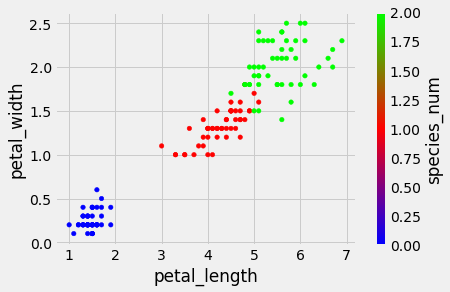

In [166]:
# Scatterplot of petal_length vs. petal_width, colored by species
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num', colormap='brg');

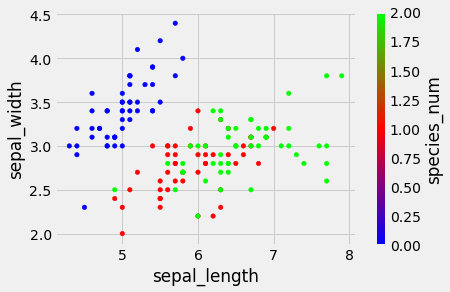

In [164]:
# Scatterplot of petal_length vs. petal_width, colored by species
iris.plot(kind='scatter', x='sepal_length', y='sepal_width', c='species_num', colormap='brg');

In [154]:
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
32,5.2,4.1,1.5,0.1,Iris-setosa,0
13,4.3,3.0,1.1,0.1,Iris-setosa,0
37,4.9,3.1,1.5,0.1,Iris-setosa,0


In [155]:
print(iris.shape)
print(iris.dtypes)

(150, 6)
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
species_num       int64
dtype: object


In [156]:
# Verify the basic stats look appropriate
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_num
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [157]:
# Test for imbalanced classes
iris.species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: species, dtype: int64

In [158]:
# Verify we are not missing any data
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
species_num     0
dtype: int64

In [159]:
# Sort the DataFrame by petal_width.
iris.sort_values(by='petal_width', ascending=True, inplace=True)

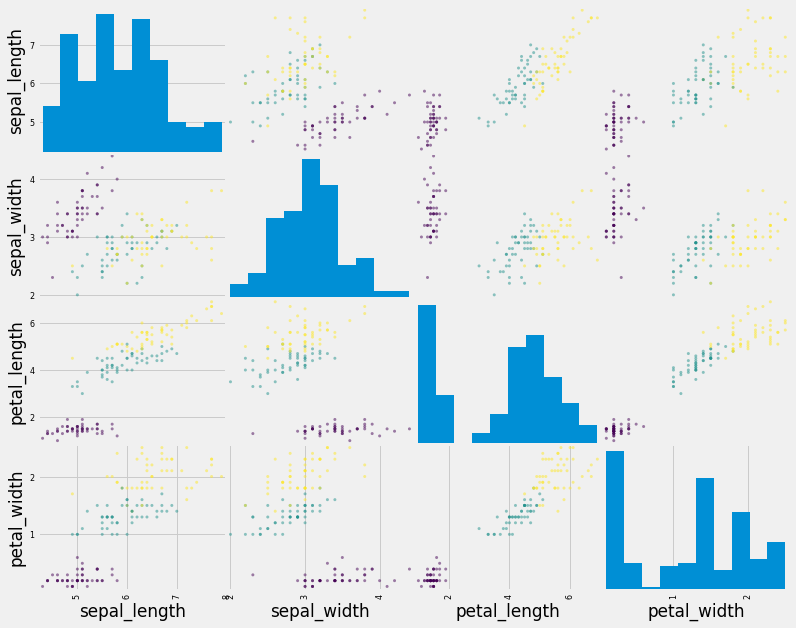

In [167]:
# Scatter matrix of all features, colored by species.
pd.plotting.scatter_matrix(iris.drop('species_num', axis=1), c=iris.species_num, figsize=(12, 10));

## KNN Classification of the Iris Dataset

### Create your feature matrix "X"
This will be all species measurements (sepal length, petal width, etc...)

In [186]:
iris.head(3)
# Create X for 4 features and y.
feature_cols = ['sepal_length','sepal_width','petal_length','petal_width']
X = iris[feature_cols]
print(X.head(2))

    sepal_length  sepal_width  petal_length  petal_width
32           5.2          4.1           1.5          0.1
13           4.3          3.0           1.1          0.1


### Create your target vector "y"
This will be the species type.

In [187]:
y = iris['species_num']
print(y.head(2))

32    0
13    0
Name: species_num, dtype: int64


### Make Use of Train-Test-Split
Split your data in to train and test sets.

In [189]:
from sklearn.model_selection import train_test_split

#Step 1: Split X and y into training and testing sets (using random_state for reproducibility).
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

### Import KNN From `scikit-learn` and Instatiate a Model With One Neighbor

In [191]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#Step 2: Train the model on the training set (using K=1).
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

### Check the Accuracy
Train your model using the training set then use the test set to determine the accuracy

In [192]:
#Step 3: Test the model on the testing set and check the accuracy.
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.9736842105263158


### Create a Model With Five Neighbors. Did it Improve?

In [193]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#Step 2: Train the model on the training set (using K=5).
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [194]:
#Step 3: Test the model on the testing set and check the accuracy.
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.9736842105263158


Model with one and five neighbors has same accuracy.

### Create a Looped Function That Will Check All Levels of Various Neighbors and Calculate the Accuracy

### Bonus: According to `scikit-learn` Documentation, What is `knn.predict_proba(X_new)` Going to Do?

KNN's predict_proba is used to predict probabilities

## Enrichment
_Everything beyond this point is enrichment and examples using Statsmodels for linear regression._

### Example: Using the Statsmodels Formula

Adapt the formula example using your metrics. We will review this implementation in class. Here is a reference to consider. The workflow is the same, but the syntax is a little different. We want to get accustomed to the formula syntax because we will be using them a lot more with regressions. The results should be comparable to scikit-learn's regression models.

In [116]:
# First, format our data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [117]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1220.
Date:                Fri, 29 Jun 2018   Prob (F-statistic):          1.59e-321
Time:                        22:38:19   Log-Likelihood:                -1567.7
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     498   BIC:                             3185.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9744      0.224     22.197      0.000       4.534       5.415
LSTAT         -0.5615      0.048    -11.817      0.000      -0.655      -0.468
RAD            0.2109      0.070      3.025      0.003       0.074       0.348
TAX           -0.0174      0.004     -4.267      0.000      -0.025      -0.009
NOX            4.3456      3.385      1.284      0.200      -2.305      10.997
INDUS          0.0925      0.067      1.385      0.167      -0.039       0.224
CRIM          -0.0866      0.037     -2.362      0.019      -0.159      -0.015
ZN             0.0288      0.013      2.215      0.027       0.003       0.054
==============================================================================
Omnibus:                      192.072   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              831.634
Skew:                           1.665   Prob(JB):                    2.59e-181
Kurtosis:                       8.325   Cond. No.                     6.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test-train split or k-folds?

### Bonus Challenge #2:

Given a combination of predictors, can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

_Tip: Check out pairplots, coefficients, and Pearson scores._

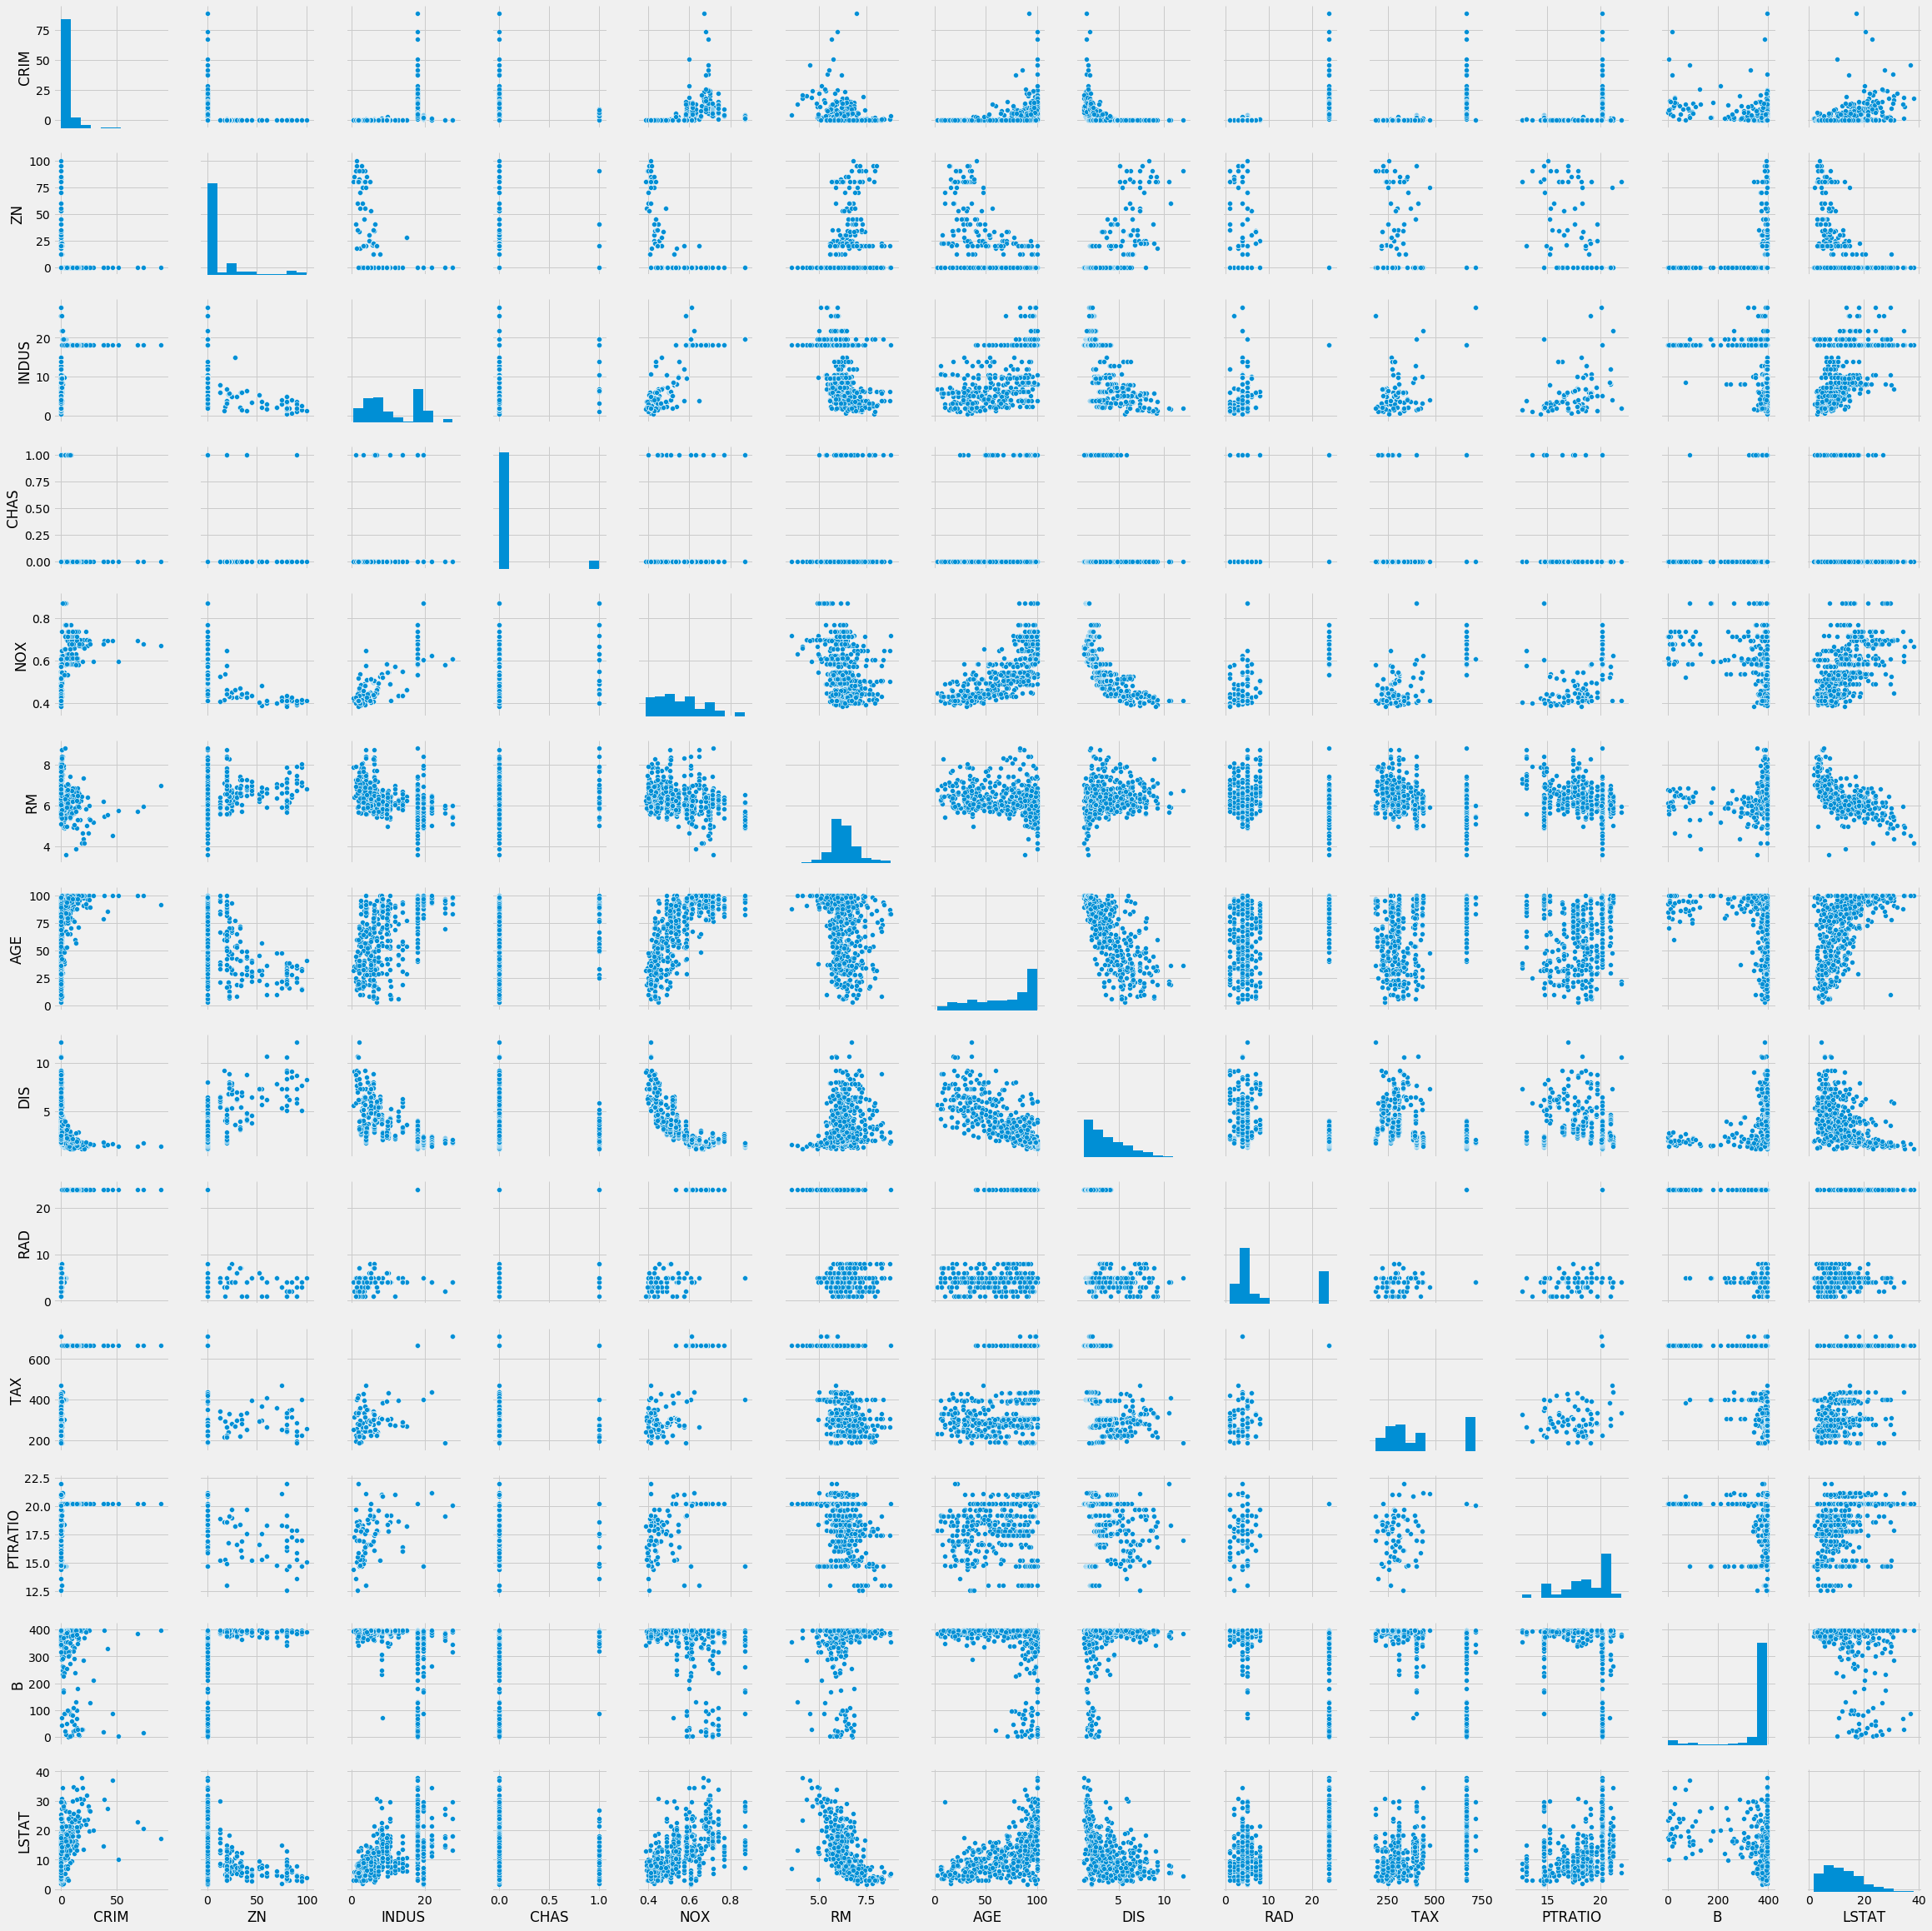

In [118]:
# Check out variable relations
import seaborn as sns

sns.pairplot(X);

In [119]:
# Check out Pearson scores


## Demo: Patsy

In [120]:
import patsy

# Add response to the core DataFrame
df['MEDV'] = y

In [121]:
from sklearn.model_selection import train_test_split #If you didn't import it earlier, do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


D:\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [122]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))

R^2 Score: 0.47233968587619024
